# 🧠 Exploratory Data Analysis — Titanic Dataset

**Objective:**  
_"Understand the demographic and survival patterns in the Titanic dataset."_

**Author:** Farishtey Irani 
**Date:** 13-09-2025


In [1]:
# --- Importing the required libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- Loading the dataset ---
# Placing the path to the csv file
df = pd.read_csv(r"C:\Users\Farishtey\Documents\IBM SPSS Statistics V21 x64\SPSS DATASETS and CSV\Titanic_Train.csv")
df.head() #This is used to see the first 5 records of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📋 1. Basic Information

- Number of rows & columns
- Column names & data types
- First 5 rows
- Any initial thoughts


In [3]:
print("Shape:", df.shape) #We can see the number of rows * number of coulumns i.e. dimen
print("\nColumn Info:")
display(df.info())
display(df.head())

Shape: (891, 12)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- The _Cabin_ column has a lot of missing values followed by _Age_
- The dataset has **7** numeric columns and **5** non numeric (string) columns

## 🧹 2. Data Quality Checks

- Missing values
- Duplicates
- Constant or irrelevant columns


In [4]:
print("Missing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicate rows: 0


- _PassengerId_ is irrelevant to the prediction
- _Name_ is irrelevant to the prediction

## 📊 3. Univariate Analysis

Explore each column individually.
- Distributions for numeric columns
- Counts for categorical columns
- Detect skewness or imbalance


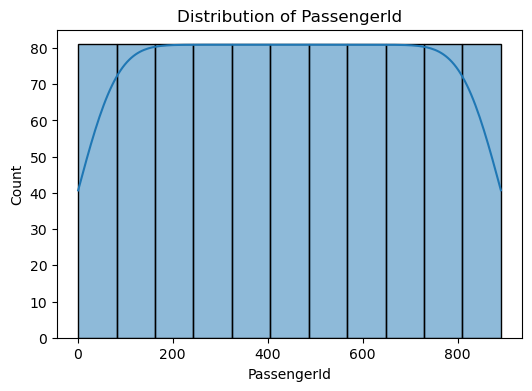

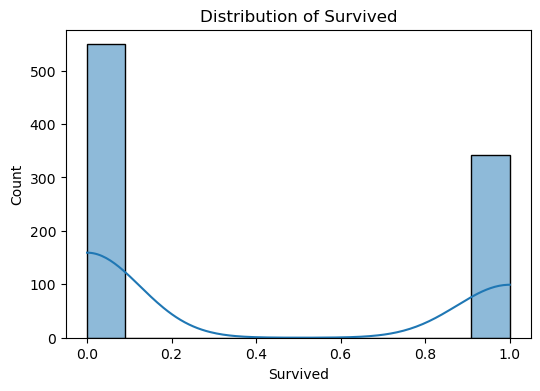

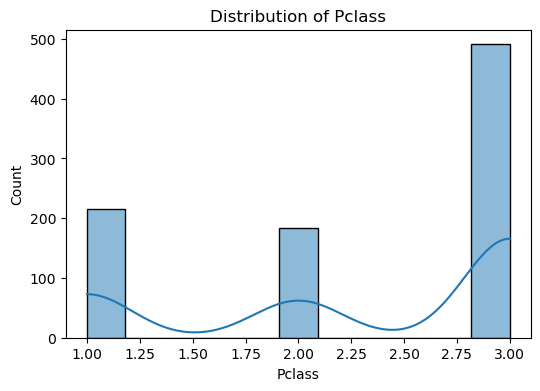

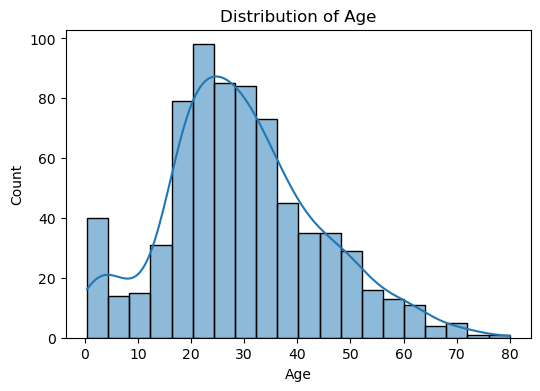

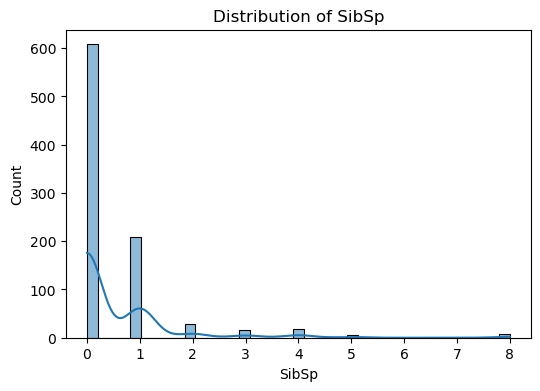

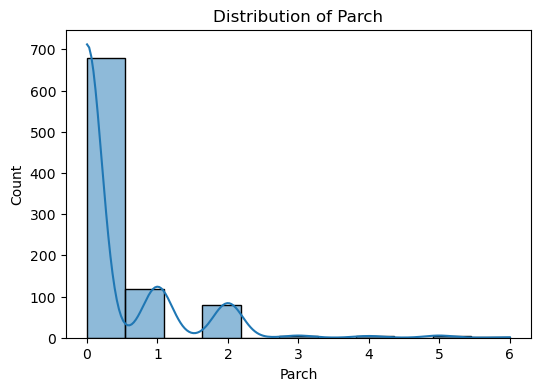

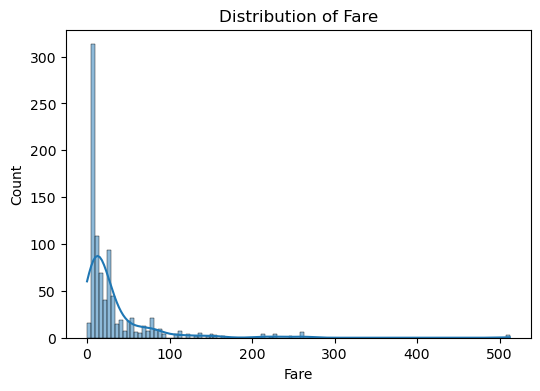

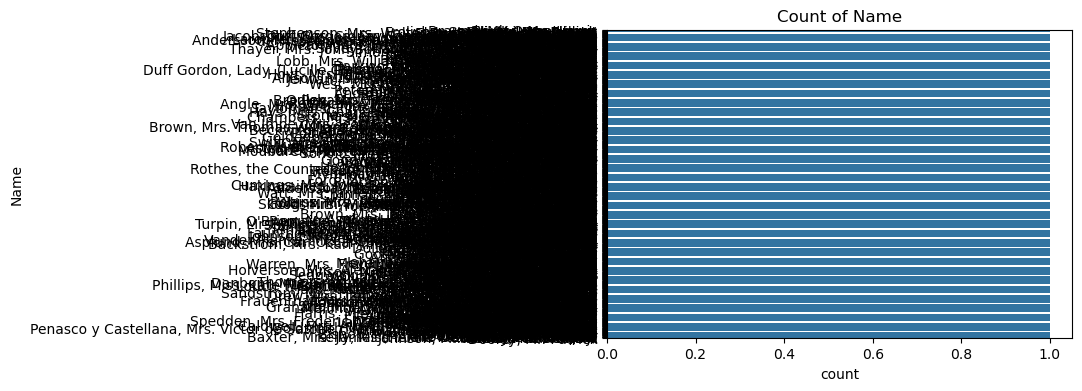

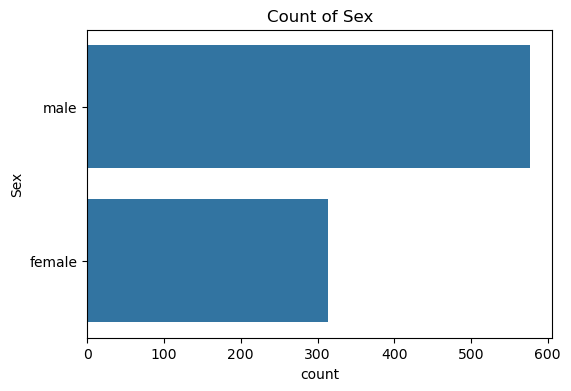

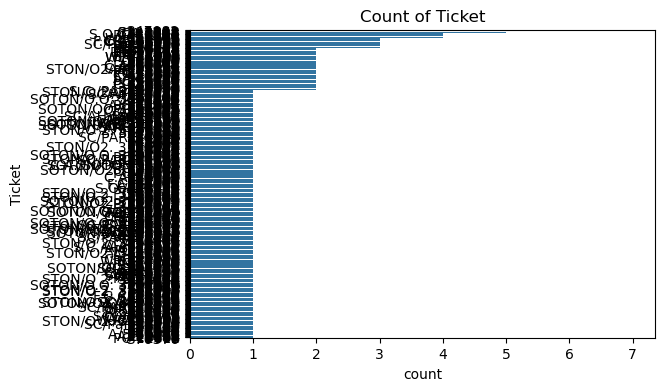

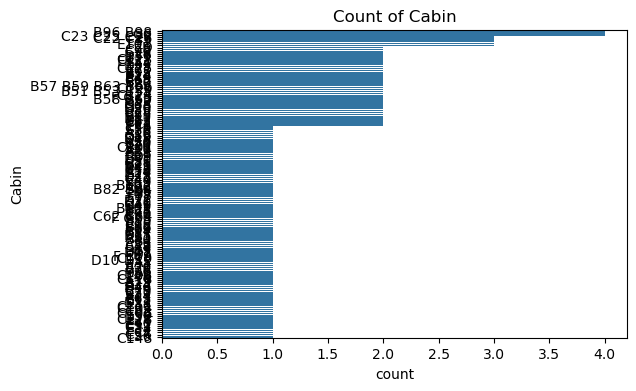

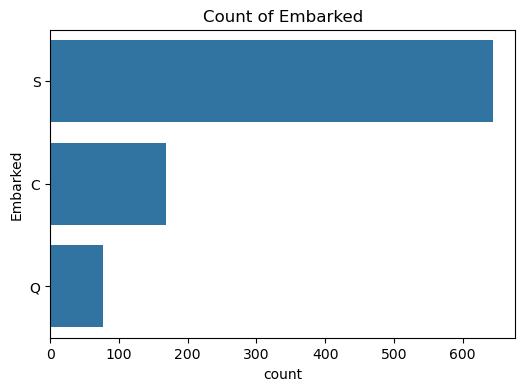

In [5]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object','category']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()


## 📌 Observations from Univariate Analysis
- _PassengerId_ is unique i.e each has one occurence
- _Survived_ class is imbalanced
- _Pclass_ is slightly imbalanced
- _Age_ is positively skewed
- _SibSp_ class is positively skewed
- _Parch_ is positively skewed
- _Fare_ is positively skewed
- _Name_ is unique ie. each one has one occurence
- _Sex_ class is imbalanced
- _Ticket_ is mostly unique 
- _Cabin_ is mostly unique 
- _Embarked_ class is imbalanced


## 📈 4. Bivariate Analysis

- Correlation between numeric columns
- Compare target variable with others (if available)
- Scatterplots / boxplots


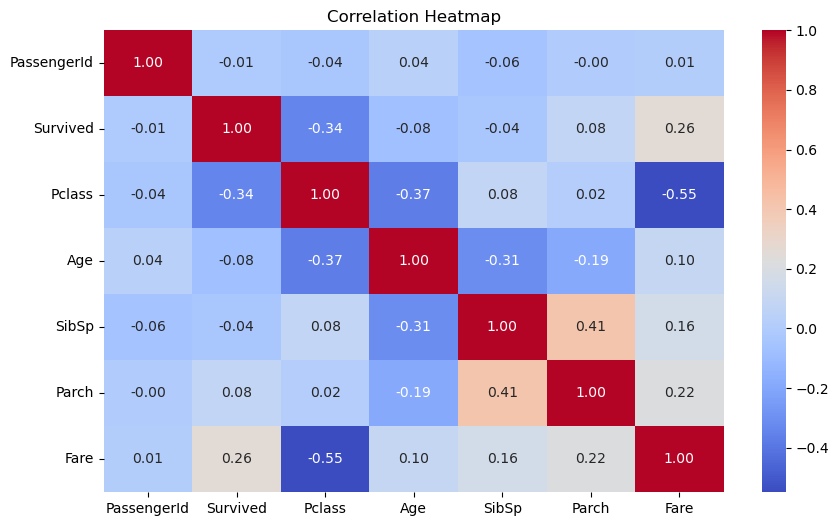

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

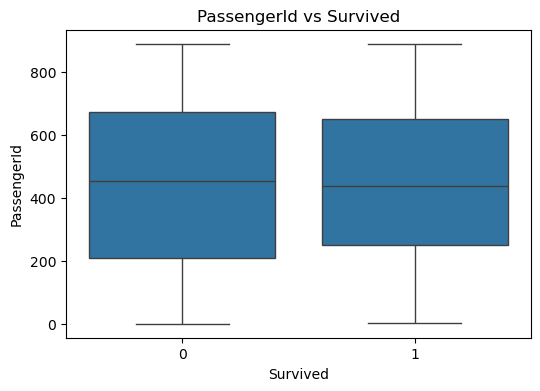

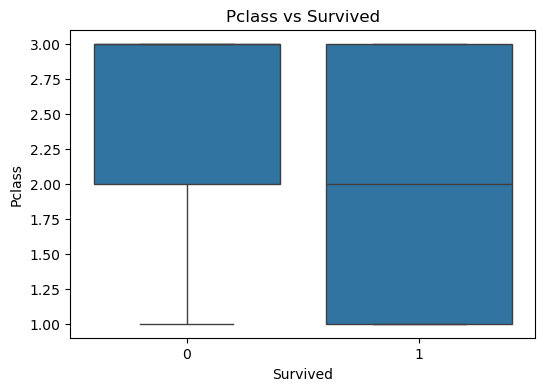

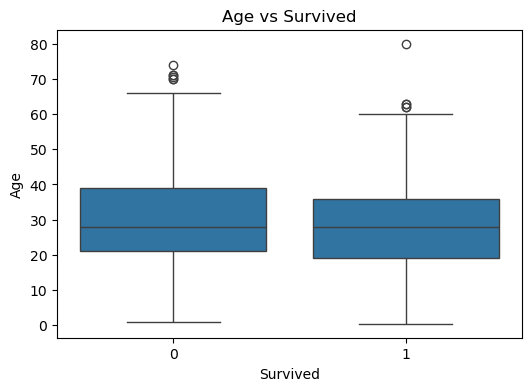

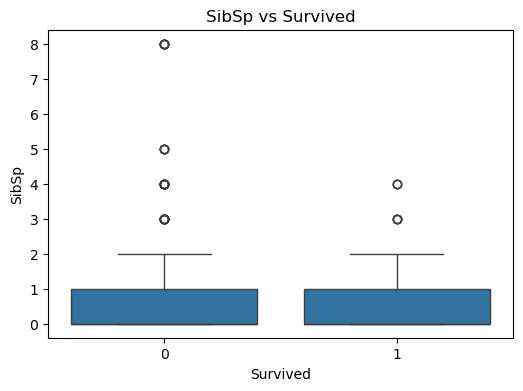

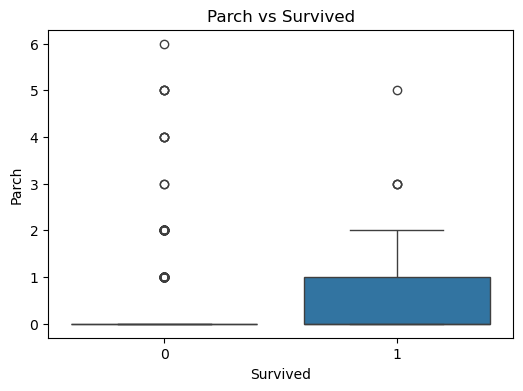

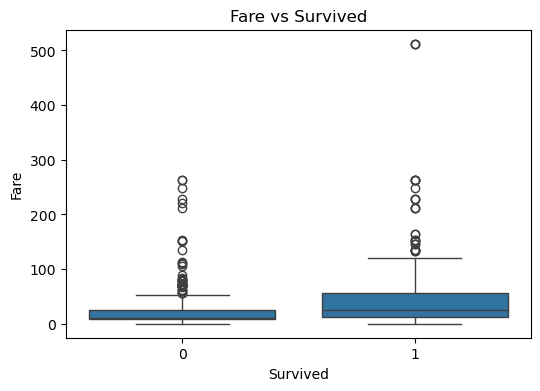

In [7]:
for col in num_cols:
    if col != 'Survived':
        plt.figure(figsize=(6,4))
        sns.boxplot(x='Survived', y=col, data=df)
        plt.title(f'{col} vs Survived')
        plt.show()


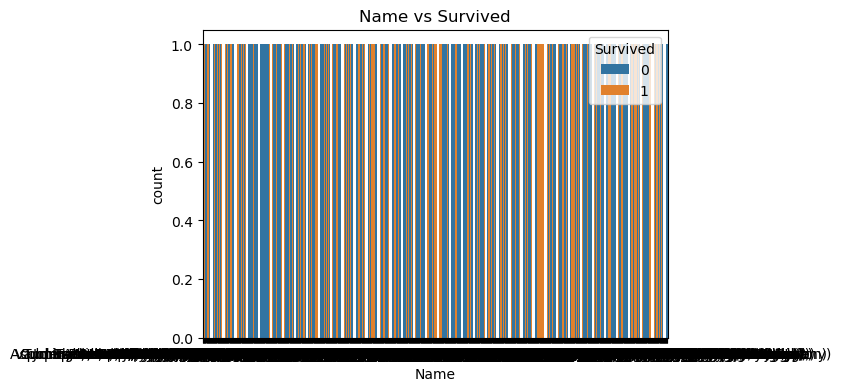

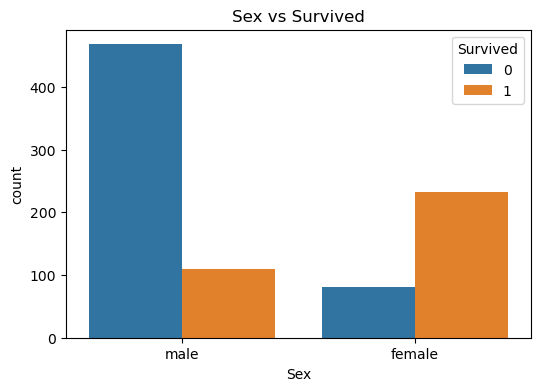

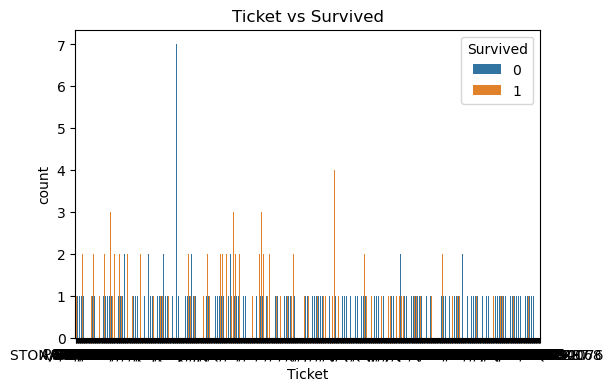

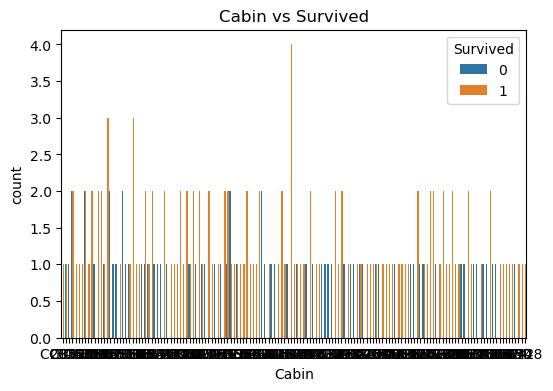

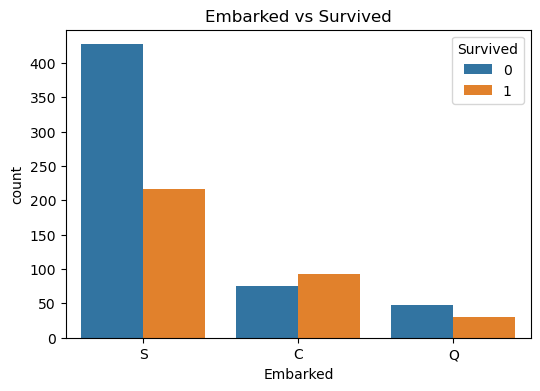

In [8]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Survived', data=df)
    plt.title(f'{col} vs Survived')
    plt.show()


## 📌 Observations from Bivariate Analysis

- Gender (Sex): Females had a much higher survival rate than males.
- Passenger Class (Pclass): Passengers in 1st class had a much higher survival rate compared to those in 3rd class.
- Fare: Higher fare values generally correlate with higher survival chances.
- Age: Age does not show a strong or clear relationship with survival — survival rates are fairly spread across ages.
- Other features: Some of the plots (like PassengerId, SibSp, Parch Name, Cabin, Ticket) appear messy or unclear, showing no obvious relationship with survival.

## ⚠️ 5. Outlier Detection

- Boxplots for numeric columns
- Notes on potential outliers


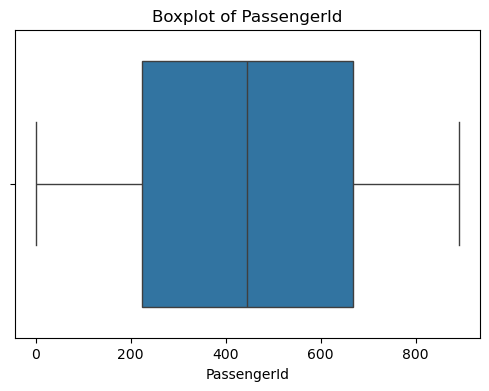

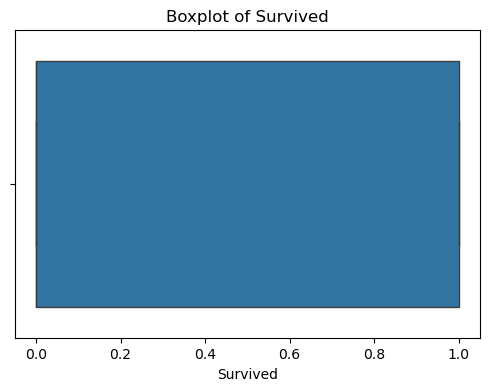

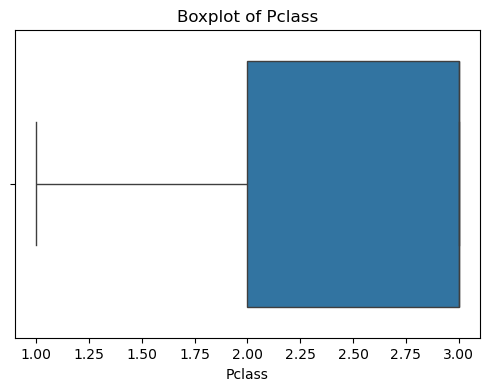

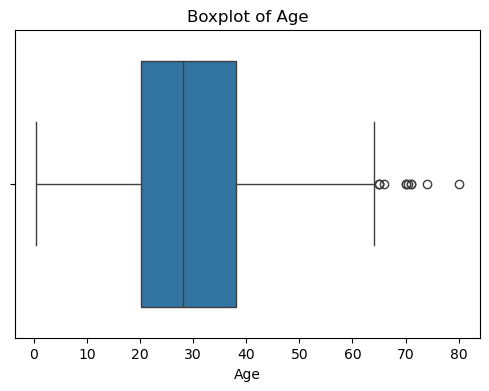

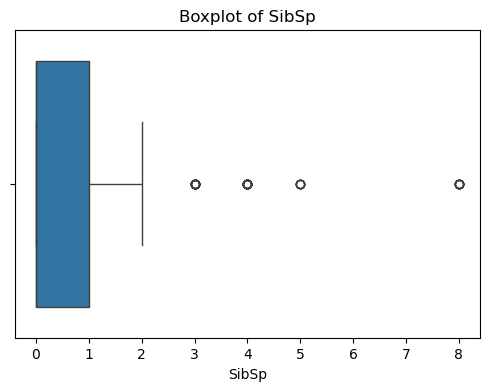

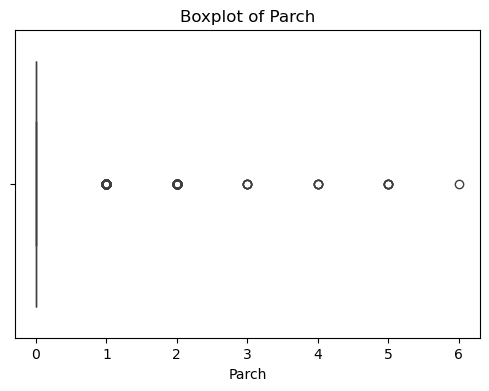

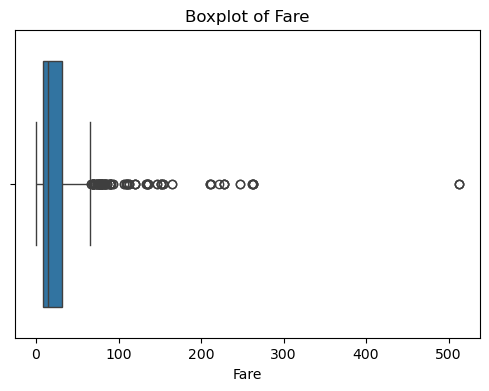

In [9]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## 📌 Observations from Outlier Detection

- The points outside the box are considered outliers — values lying beyond the normal range (1.5 × IQR rule).
- These outliers are values that are much higher or lower than most other points in that feature.

- For Parch, almost all passengers have a value of 0, so:
  - The box is collapsed at 0 (no spread between quartiles)
  - The few non-zero values (like 1, 2, 3, etc.) are shown as outlier dots
  - This does not mean those values are errors, only that they are rare compared to the majority (0)

## 💡 6. Key Insights and Next Steps

## 📝 Summary of Insights from the Dataset

### 📊 Univariate Analysis
- The dataset contains information about passengers (like age, sex, class, fare, etc.) and whether they survived.
- Most passengers were in **3rd class**.
- Majority of passengers were **male**.
- The **age distribution** is concentrated between 20–40 years.
- Most passengers had **0 siblings/spouses (SibSp)** and **0 parents/children (Parch)** with them.
- **Fare** values are highly skewed with a few very high values.

### 📈 Bivariate Analysis
- **Females had a much higher survival rate than males**.
- **1st class passengers had the highest survival rates**, while **3rd class had the lowest**.
- **Higher fares were associated with higher survival chances**.
- **Age did not show a strong impact** on survival.
- Some scatterplots were messy and **did not reveal clear relationships**.

### ⚠️ Outlier Detection
- Outliers were detected in features like **Fare, Age, SibSp, and Parch**.
- For **Parch**, almost all values are 0 for most passengers, making 0 the **norm**, and the few non-zero values appear as **outliers** on the boxplot.
- The points beyond the whiskers in boxplots represent **outliers lying outside the normal range**.


## ⚙️ Data Issues to Fix Before Modeling

- **Missing Values**
  - `Age` has several missing values.
  - `Cabin` has many missing values.
  - `Embarked` has a few missing values.

- **Outliers**
  - Detected in `Fare`, `Age`, `SibSp`, and `Parch`.
  - Need to handle them using techniques like capping, transformation, or removal.

- **Encoding**
  - Categorical columns like `Sex` and `Embarked` need to be **encoded into numeric form** (Label Encoding or One-Hot Encoding).

- **Scaling**
  - Numeric features like `Age` and `Fare` vary in scale.
  - Should apply **feature scaling** (Standardization or Min-Max Scaling) to improve model performance.


## 🚀 Next Steps in the Project

- **Data Cleaning**
  - Impute missing values in `Age`, `Embarked`, and handle the largely missing `Cabin` column.
  - Treat or remove outliers from `Fare`, `Age`, `SibSp`, and `Parch`.

- **Feature Engineering**
  - Extract useful information from `Name` (like titles: Mr, Mrs, etc.).
  - Create family size from `SibSp` + `Parch`.
  - Drop irrelevant or unique columns like `PassengerId`, `Ticket`, and possibly `Cabin` if too sparse.

- **Encoding**
  - Convert categorical variables (`Sex`, `Embarked`, `Pclass`) into numeric form using encoding techniques.

- **Feature Scaling**
  - Scale numeric columns (`Age`, `Fare`) to bring them to a similar range.

- **Modeling**
  - Split data into training and testing sets.
  - Train and evaluate multiple classification models (Logistic Regression, Random Forest, etc.).
  - Compare model performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
